# Ablone Case Study

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Hrushikesh/Desktop/abalone.csv")

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.columns.tolist()

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [5]:
df.shape

(4177, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We can see that column sex has datatype object we need to encode for further processing

In [9]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['Sex'] = lbl.fit_transform(df['Sex']) 

In [10]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
df['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [12]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


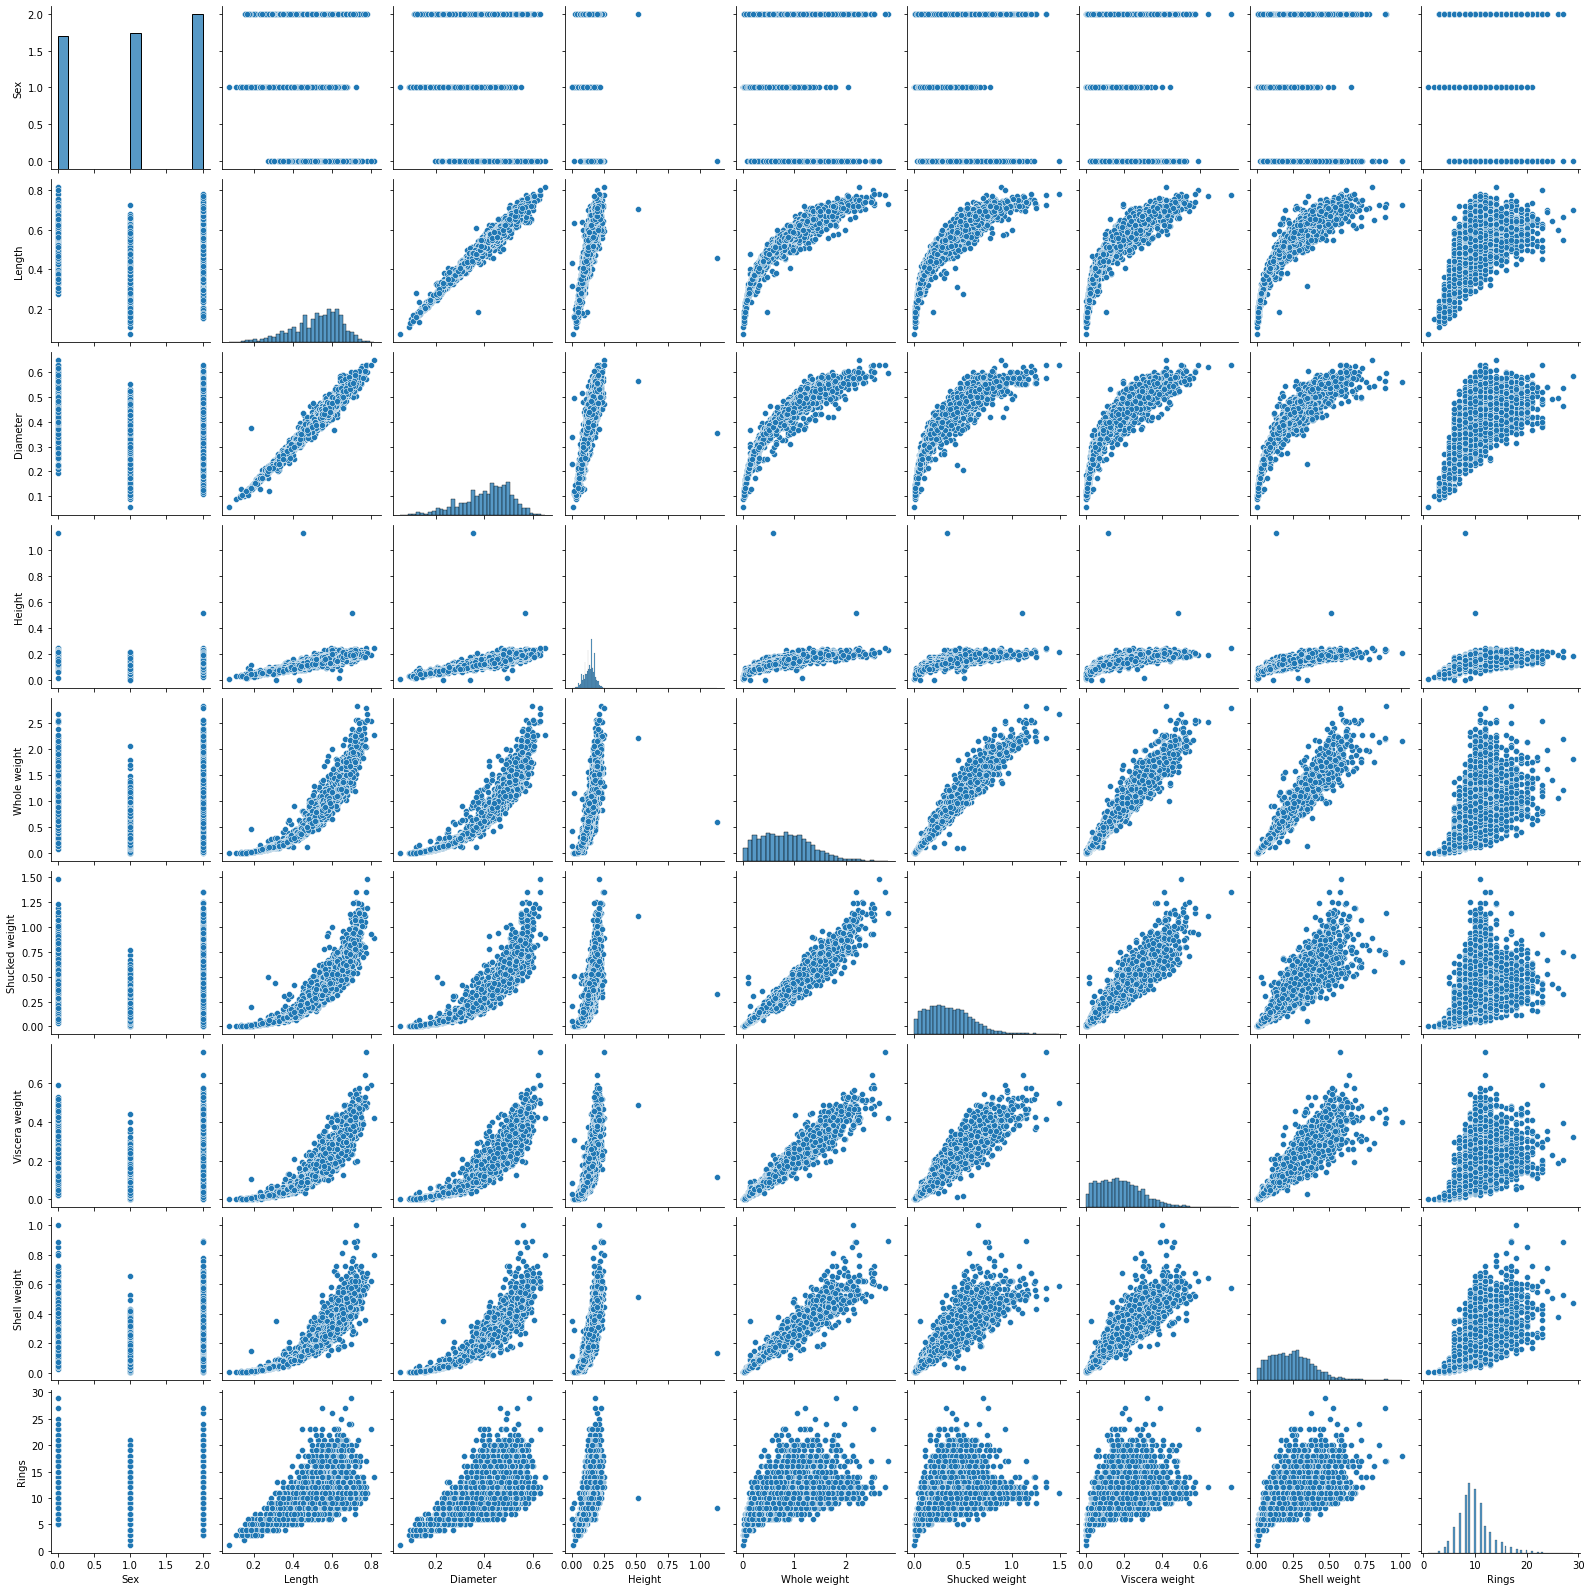

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

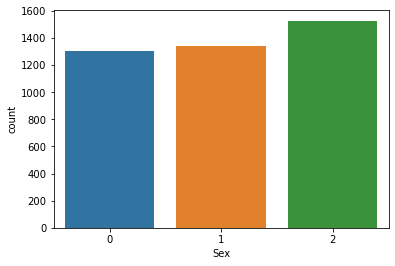

In [14]:
sns.countplot(x='Sex', data=df)

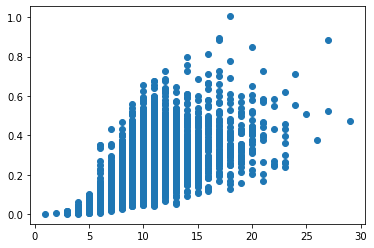

In [15]:
plt.scatter(df['Rings'],df['Shell weight'])

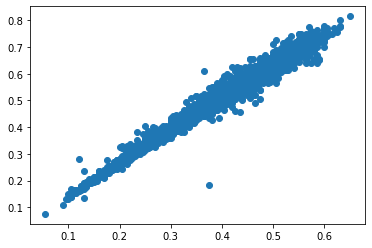

In [16]:
plt.scatter(df['Diameter'],df['Length'])

#### Highly Positive Correlation

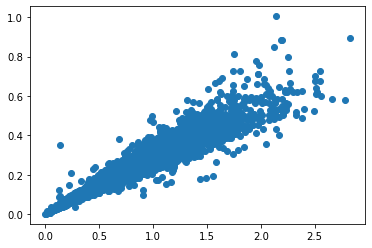

In [17]:
plt.scatter(df['Whole weight'],df['Shell weight'])

#### Positive Correlation

# Correlation

In [18]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

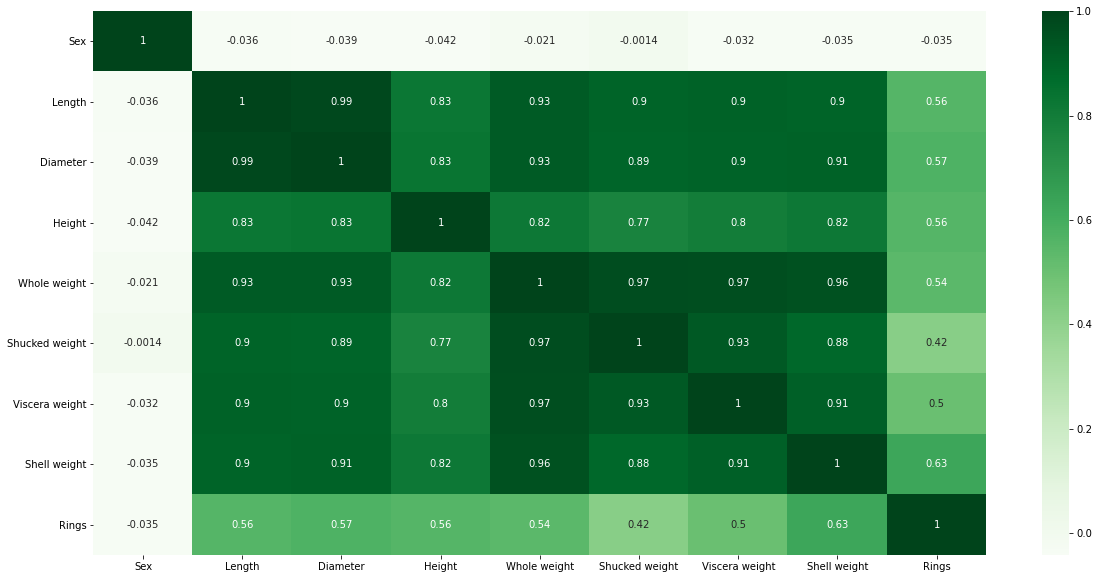

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

#### Checking the columns which are positively and negatively correlated

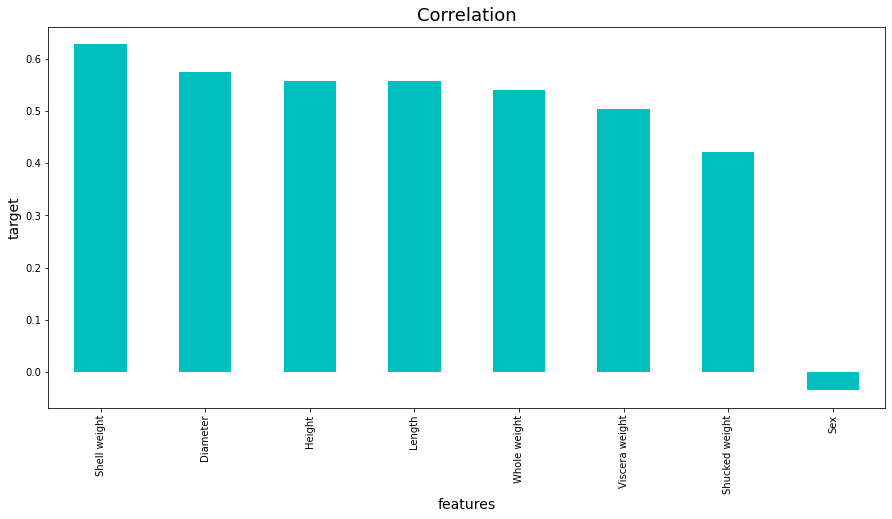

In [26]:
plt.figure(figsize=(15,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('features',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

#### All the columns have positive correlation except sex

As seen from the above heat map that shell weight has strong correlation, colomn sex and shucked weight has low correlation thus it can be droped 

In [29]:
df= df.drop(['Sex','Shucked weight'],axis=1)
df

,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.2610,0.2960,10


# Finding Outliers

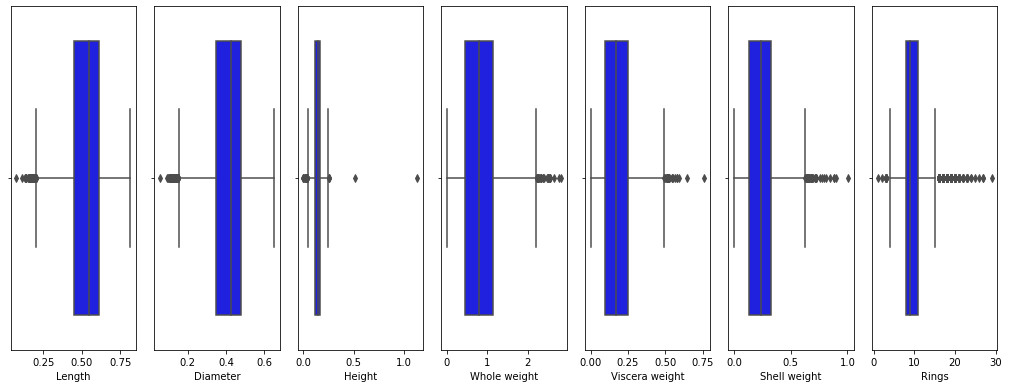

In [30]:
col_list = df.columns.values
ncol = 15
nrows = 15
plt.figure(figsize =(30,80))
for i in range(0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[col_list[i]],color = 'blue', orient = 'h')
    plt.tight_layout()

#### All Colomns have Outliers

## Removing outliers

In [31]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(4177, 7)

In [33]:
threshold = 3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  236,  237,  237,  238,
        238,  239,  270,  275,  277,  278,  294,  310,  313,  314,  334,
        351,  355,  358,  358,  362,  375,  416,  417,  428,  431,  433,
        469,  478,  480,  501,  526,  526,  530,  572,  628,  673,  674,
        675,  678,  694,  696,  696,  719,  719,  720,  720,  744,  754,
        756,  811,  891,  891, 1048, 1051, 1052, 1204, 1206, 1207, 1207,
       1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428, 1429, 1429, 1757,
       1759, 1762, 1762, 1763, 1763, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2623, 2624, 2624, 2709, 2710, 2810, 2811, 2811,
       2863, 2863, 3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193,
       3280, 3359, 3427, 3427, 3599, 3628, 3715, 3

In [34]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 7)
(4046, 7)


# Percentage Data Loss

In [35]:
loss_percent =(4177-4046)/4177*100
print(loss_percent)

3.136222169020828


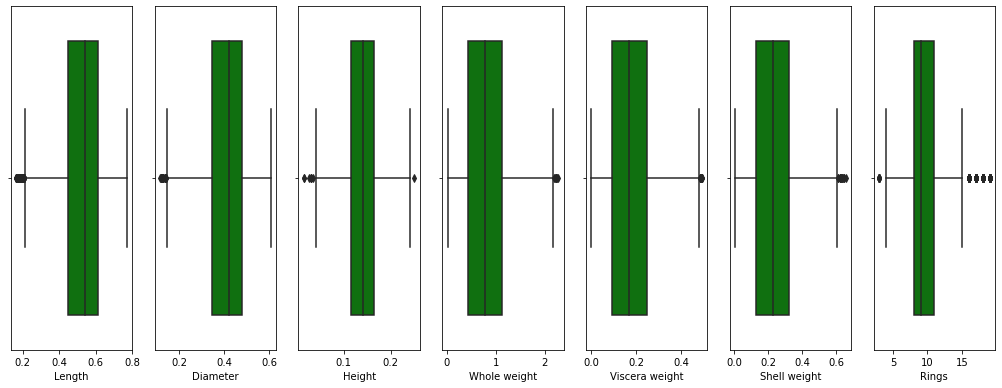

In [38]:
col_list = df_new.columns.values
ncol = 15
nrows = 15
plt.figure(figsize =(30,80))
for i in range(0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[col_list[i]],color = 'green', orient = 'h')
    plt.tight_layout()

### Still outliers are present using iqr method to remove outliers

In [43]:
from scipy import stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)
df1 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df1.shape

(3801, 7)

In [44]:
loss_percent =(4177-3801)/4177*100
print(loss_percent)

9.00167584390711


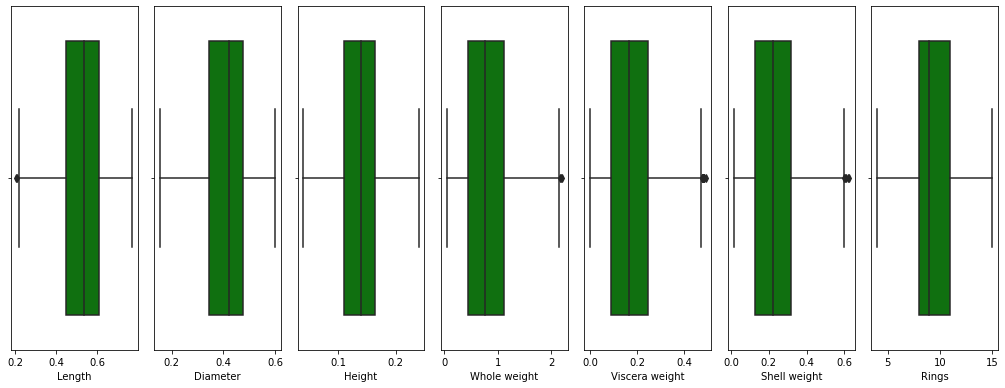

In [45]:
col_list = df1.columns.values
ncol = 15
nrows = 15
plt.figure(figsize =(30,80))
for i in range(0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[col_list[i]],color = 'green', orient = 'h')
    plt.tight_layout()

#### Still outliers are present again using zscore method 

In [46]:
z_scr=zscore(df1)
print(df1.shape)
df_new=df1.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(3801, 7)
(3789, 7)


In [47]:
Q1 = df_new.quantile(q=.25)
Q3 = df_new.quantile(q=.75)
IQR = df_new.apply(stats.iqr)
df1 = df_new[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df1.shape

(3781, 7)

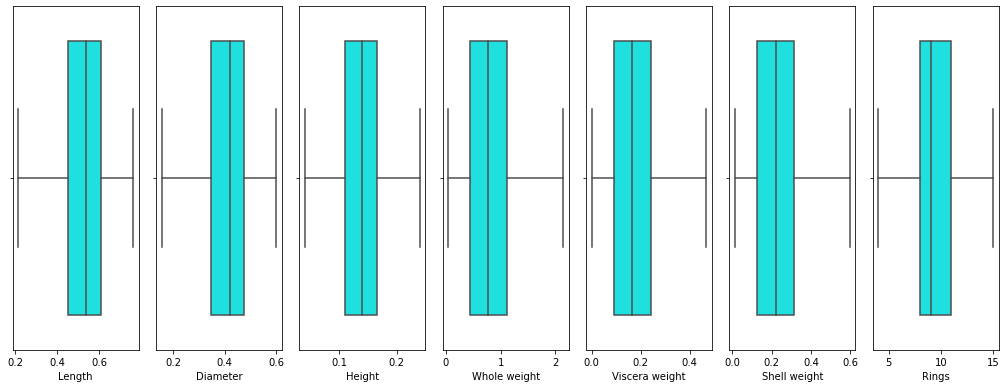

In [51]:
col_list = df1.columns.values
ncol = 15
nrows = 15
plt.figure(figsize =(30,80))
for i in range(0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[col_list[i]],color = 'cyan', orient = 'h')
    plt.tight_layout()

#### Now the dataset has no outliers

# Normal Distribution

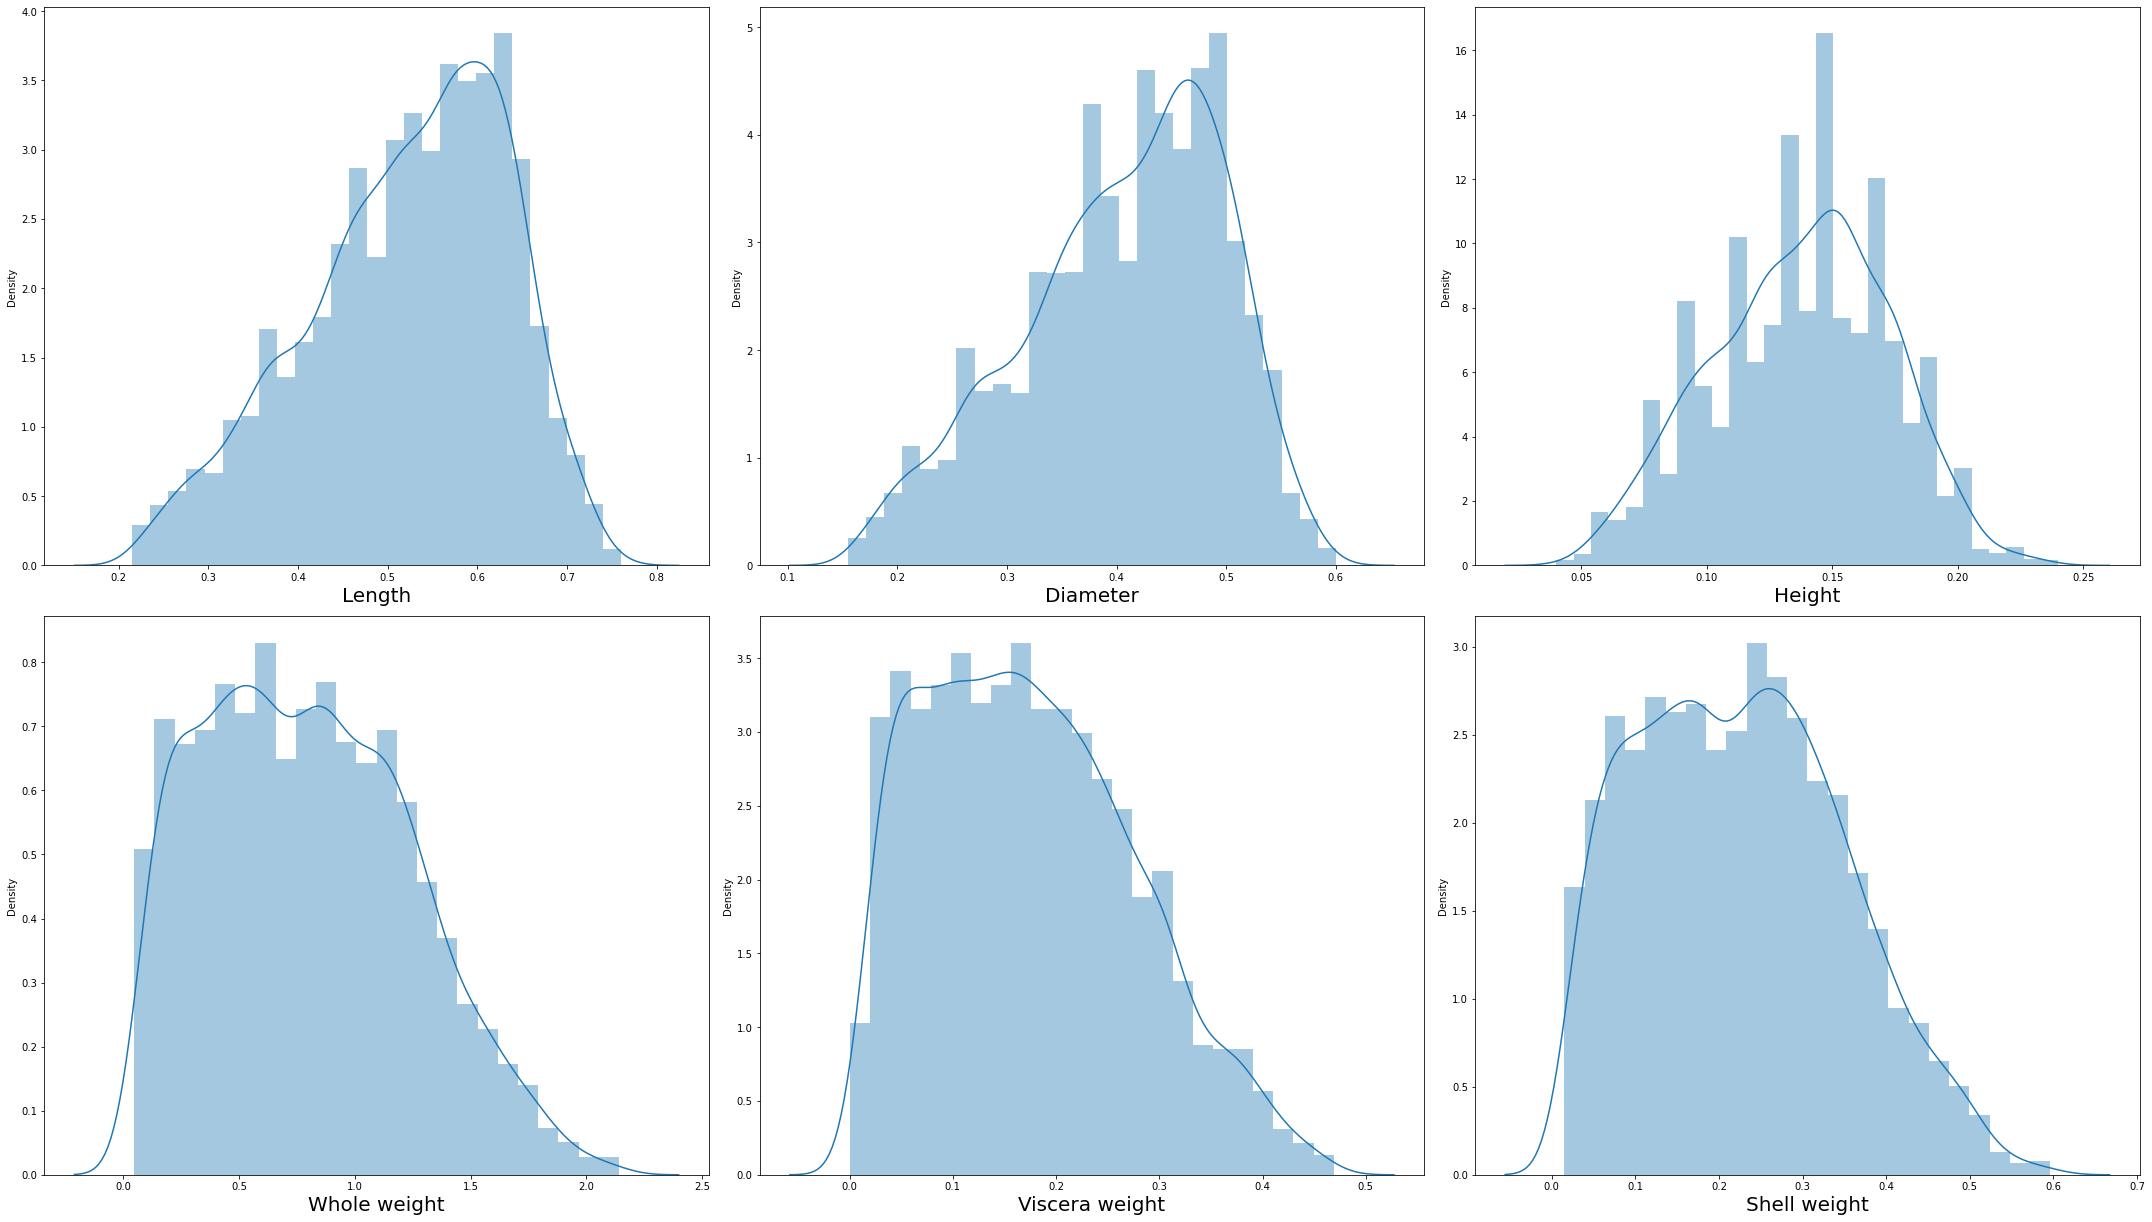

In [58]:
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='Rings', ylabel='Length'>

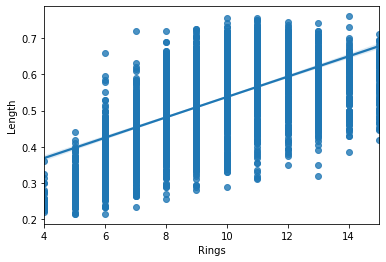

In [59]:
sns.regplot(data=df1,x='Rings', y='Length')

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

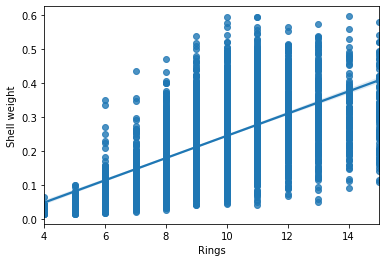

In [60]:
sns.regplot(data=df1,x='Rings', y='Shell weight')

<AxesSubplot:xlabel='Rings', ylabel='Height'>

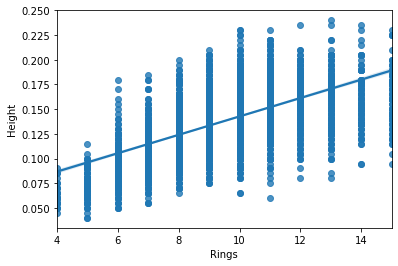

In [62]:
sns.regplot(data=df1,x='Rings', y='Height')

#### We observe from above plots that increasing in features there is increase in Ring size. Thats why it is a problem of regression

# Splitting Features and Labels

In [63]:
x = df1.drop(columns=['Rings'])
y = df1[['Rings']].values

In [64]:
x.shape

(3781, 6)

# Checking for Skewness

In [66]:
print(x.skew())

Length           -0.487048
Diameter         -0.479041
Height           -0.150128
Whole weight      0.368068
Viscera weight    0.439815
Shell weight      0.319787
dtype: float64


In [67]:
print(len(x.skew().loc[x.skew()>0.55]))

0


### It means that features data is not biased

# Feature Scaling

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-0.59541818, -0.43609615, -1.20287663, -0.6263238 , -0.72188877,
        -0.62223238],
       [-1.53788173, -1.52145655, -1.34474688, -1.27215177, -1.24124163,
        -1.27625336],
       [ 0.07777007,  0.16085208, -0.06791461, -0.26143659, -0.32124513,
        -0.13171664],
       ...,
       [ 0.7060791 ,  0.7578003 ,  1.91826891,  0.85561075,  1.12305044,
         0.66945906],
       [ 0.93047518,  0.86633634,  0.35769614,  0.67316714,  0.8609009 ,
         0.57135591],
       [ 1.69342186,  1.62608863,  1.63452841,  2.58490748,  2.0034772 ,
         2.1982331 ]])

# Checking Multi-Colinearity

In [76]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,39.253653,Length
1,40.032141,Diameter
2,6.453310,Height
3,33.268095,Whole weight
4,15.864635,Viscera weight
5,16.290301,Shell weight


#### Removing Highest Colinearity that is Diameter and Whole width

In [77]:
x = df1.drop(columns = ['Diameter','Rings','Whole weight'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif["Features"] = x.columns
vif


,vif,Features
0,9.162710,Length
1,6.313877,Height
2,8.310698,Viscera weight
3,10.507904,Shell weight


## Model Building


In [78]:
lm = LinearRegression()

In [88]:
x_train,x_test,y_train,y_test= train_test_split(X_scaled,y, test_size=.25,random_state=323)

In [89]:
lm.fit(x_train,y_train)
predlm = lm.predict(x_test)
print('Score: ',lm.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlm))

Score:  0.3991597859790167
r2 score:  0.45735731841070715


In [92]:
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))

Score:  0.9998338423208989
r2 score:  0.11024913598762531


In [93]:
fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)
print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))

Score:  0.9176719412195997
r2 score:  0.4736924721073389


In [95]:
ls= Lasso()
ls.fit(x_train,y_train)
predls= ls.predict(x_test)
print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))

Score:  0.18504788144440731
r2 score:  0.20088764728331399


# Checking Cross Validation

In [99]:
scr= cross_val_score(lm,X_scaled,y,cv=5)
print('cross validation score for LinearRegression model: ', scr.mean())
scr= cross_val_score(dt,X_scaled,y,cv=5)
print('cross validation score for DecisionTree model: ', scr.mean())
scr= cross_val_score(fr,X_scaled,y,cv=5)
print('cross validation score for RandomForest model: ', scr.mean())
scr= cross_val_score(ls,X_scaled,y,cv=5)
print('cross validation score for Lasso Regression model: ', scr.mean())

cross validation score for LinearRegression model:  0.3318983162696337
cross validation score for DecisionTree model:  -0.18453619575186903
cross validation score for RandomForest model:  0.35962761715179214
cross validation score for Lasso Regression model:  0.12780783890639627


# Saving The Model

In [101]:
import joblib

joblib.dump(lm,'Abalone.obj')

['Abalone.obj']

In [103]:
loadmodel = joblib.load('Abalone.obj')

# Conclusion

In [104]:
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,[8],[11.290035927504668]
1,[5],[7.580434542856189]
2,[7],[8.750975912745586]
3,[7],[8.327934686134437]
4,[9],[9.713154869670781]
...,...,...
941,[10],[10.408314339073065]
942,[11],[10.713784822574794]
943,[10],[11.515752774826831]
944,[9],[8.936230521948035]
